Alle meine Entchen
Schwimmen auf dem See
Schwimmen auf dem See
Köpfchen unters Wasser
Schwänzchen in die Höh.

In [1]:
import math

In [2]:
a = math.pi/2
print(2*a)

3.141592653589793


print(a*4)

In [3]:
print(a**2)

2.4674011002723395


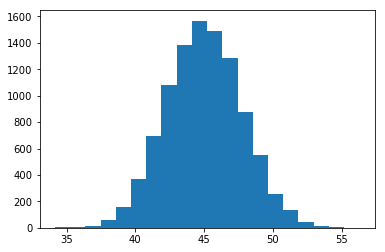

In [4]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

N=90
xlist = np.random.rand(10000)
for i in range(N-1):
    xlist += np.random.rand(10000)
h=plt.hist(xlist, 20)
plt.show()

Remember, to install iminuit, do: conda install -c astropy iminuit

In [5]:
class fcnClass:
    def gauss(self, x):
        delta = x - self.mean
        return 1/(math.sqrt(2*math.pi)*math.fabs(self.sigma)) * math.exp(-delta**2/(2*self.sigma**2))
    
    def xArray(self, oversample=1):
        xA=[]
        for bin_low, bin_up in zip(self.h[1], self.h[1][1:]):
            dx = (bin_up - bin_low)/oversample
            xA.extend(np.arange(bin_low + dx/2, bin_up, dx))
        return xA
    def dx(self, oversample):
        dxA=[]
        for bin_low, bin_up in zip(self.h[1], self.h[1][1:]):
            dxbig = (bin_up - bin_low)
            dxA.extend( [dxbig] * oversample)
#            dx = dxbig/oversample
#            for x in np.arange(bin_low + dx/2, bin_up, dx):
#                dxA.append(dxbig)
        return dxA

    def gaussArray(self, oversample=1):
        N=math.fsum(h[0])
        vals=[]
        for x, dx in zip(self.xArray(oversample), self.dx(oversample)):
            vals.append(N*self.gauss(x)*dx)
        return vals

    def gaussChi2(self):
        chi2=0
        N=math.fsum(h[0])
        for y_meas, y_theor in zip(h[0], self.gaussArray()):
            diff = y_theor - y_meas
            sig2 = math.fabs(y_theor)
            chi2 += diff**2/sig2
        return chi2
    def __call__(self, mean, sigma):
        self.mean=mean
        self.sigma=sigma
        return self.gaussChi2()
    def __init__(self, h):
        self.h=h
        self.mean=1.0
        self.sigma=1.0

In [7]:
s=10
m=45
fcn = fcnClass(h)
print(fcn.gaussArray())

[8.3490818069530941e-244, 2.8432289957114971e-260, 2.8445479599618498e-277, 8.3607065298190419e-295, 7.2193982856080275e-313, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [8]:
import iminuit
print(iminuit.describe(fcn))
m = iminuit.Minuit(fcn, mean=45, error_mean=10, limit_mean = (0, 200), sigma=10, error_sigma=2, limit_sigma = (1, 10), errordef=1)
m.migrad()
#print(m.values)  # {'x': 2,'y': 3,'z': 4}
#print(m.errors)  # {'x': 1,'y': 1,'z': 1}

['mean', 'sigma']


FCN = 18.090370395936272 
 TOTAL NCALL = 60 
 NCALLS = 60 
 
 
 EDM = 0.0001721318290722907 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean,44.9969,0.0277658,0,0,0.0,200.0,
2,sigma,2.77725,0.0197927,0,0,1.0,10.0,


({'fval': 18.090370395936272, 'edm': 0.0001721318290722907, 'nfcn': 60, 'up': 1.0, 'is_valid': True, 'has_valid_parameters': True, 'has_accurate_covar': True, 'has_posdef_covar': True, 'has_made_posdef_covar': False, 'hesse_failed': False, 'has_covariance': True, 'is_above_max_edm': False, 'has_reached_call_limit': False},
 [{'number': 0, 'name': 'mean', 'value': 44.99689579934598, 'error': 0.027765847739534166, 'is_const': False, 'is_fixed': False, 'has_limits': True, 'has_lower_limit': True, 'has_upper_limit': True, 'lower_limit': 0.0, 'upper_limit': 200.0},
  {'number': 1, 'name': 'sigma', 'value': 2.7772518009110962, 'error': 0.01979271374608471, 'is_const': False, 'is_fixed': False, 'has_limits': True, 'has_lower_limit': True, 'has_upper_limit': True, 'lower_limit': 1.0, 'upper_limit': 10.0}])

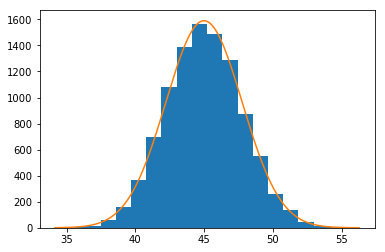

In [9]:
eggs=fcn.xArray(100)
why=fcn.gaussArray(100)
plt.hist(xlist, 20)
plt.plot(eggs,why)
plt.show()

In [ ]:
def grauss(x, mean, sigma):
    delta = x - mean
    return 1/(math.sqrt(2*math.pi)*math.fabs(sigma)) * math.exp(-delta**2/(2*sigma**2))

class chi2:
    def __init__(self, h, pdf):
        self.h=h
        self.pdf=pdf
    def